In [178]:
pip install altair

Note: you may need to restart the kernel to use updated packages.


### Importación de data

In [179]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
netflix_base=pd.read_csv('C:/Users/Cristhian/Documents/Python nuevo/netflix_titles.csv')
netflix_base
#link de dataset: https://www.kaggle.com/shivamb/netflix-shows

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

### Información general

In [183]:
#Observamos la cantidad de osbervaciones (filas) y variables (columnas) 
netflix_base.shape

(8807, 12)

In [184]:
#Observamos el tipo de datos de la base
netflix_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Data Cleaning

In [185]:
#Data cleaning
for i in netflix_base.columns:
    null_rate = netflix_base[i].isna().sum() / len(netflix_base) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


Esto significa que 6 columnas (director,cast,country,date_added,rating y duration) tienen missing values. Si queremos ver los missings values de cada variable, hacemos esto

In [186]:
netflix_base.isnull().sum().sort_values(ascending = False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [187]:
#Para solucionar el problema de missings de country, podemos usar la función mode que permite colocar el valor con mayor
#frecuencia de la serie. En este caso, el país con mayor frecuencia es USA. Entonces donde haya missings, dirá USA
netflix_base['country'] = netflix_base['country'].fillna(netflix_base['country'].mode()[0])

#Mantengo información del director y el cast, pues es interesante saber la producción detrás de la serie o película
netflix_base['director'].replace(np.nan, 'Unknown',inplace  = True)
netflix_base['cast'].replace(np.nan, 'Not specified',inplace  = True)

In [188]:
#Elimino duplicados
netflix_base.drop_duplicates(inplace=True)
netflix_base.isnull().sum()
#Observamos que ya no hay missings values en country y tampoco los hay en director y cast.
#Ahora, solo hay 17 missing values. Estos provienen de las variables date_added, rating y duration.

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [189]:
#Elimino los missings values
netflix_base.dropna(inplace=True)
netflix_base

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                         Not specified  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                         Not specified  United States   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                      Not specified  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8790 rows x 12 columns]

In [190]:
#Sin embargo, es clave considerar que Netflix se creó en 1997. Entonces, por ejemplo, no es justo comparar el tiempo que le 
#toma a netflix subir películas de los 2000 con el tiempo que le toma subir películas de 1950, debido a que en 
#en 1950 aún ni se creaba Netflix.Para evitar este problema, recorto la data para películas estrenadas mayores a 1997.
netflix_base=netflix_base[netflix_base['release_year']>=1997]

In [191]:
netflix_base.info() #todas las variables tiene la misma cantidad de observaciones

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8378 non-null   object
 1   type          8378 non-null   object
 2   title         8378 non-null   object
 3   director      8378 non-null   object
 4   cast          8378 non-null   object
 5   country       8378 non-null   object
 6   date_added    8378 non-null   object
 7   release_year  8378 non-null   int64 
 8   rating        8378 non-null   object
 9   duration      8378 non-null   object
 10  listed_in     8378 non-null   object
 11  description   8378 non-null   object
dtypes: int64(1), object(11)
memory usage: 850.9+ KB


### Creación de variables y manipulación de datos

In [192]:
#Creo la variable tiempo de subida a neftlix, que determina qué tiempo le demoró a Neflix subir una película a su 
#plataforma una vez que esta fue estrenada

#Para ello, tengo que configurar la variable date_added a formato fecha de tiempo.
netflix_base["date_added"] = pd.to_datetime(netflix_base['date_added'])
#Extraemos solo el número del mes de la variable date_added
netflix_base['month_added']=netflix_base['date_added'].dt.month
#Extraemos solo el nombre del mes de la variable date_added
netflix_base['month_name_added']=netflix_base['date_added'].dt.month_name()
#Extraemos el año de la variable date_added
netflix_base['year_added'] = netflix_base['date_added'].dt.year
netflix_base

C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_13576/3064062598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_base["date_added"] = pd.to_datetime(netflix_base['date_added'])
C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_13576/3064062598.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_base['month_added']=netflix_base['date_added'].dt.month
C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_13576/3064062598.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                         Not specified  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                         Not specified  United States   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                      Not specified  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating   duration  \
0    2021-09-25          2020  PG-13     90 min   
1    2021-09-24          2021  TV-MA  2 Seasons   
2    2021-09-24          2021  TV-MA   1 Season   
3    2021-09-24          2021  TV-MA   1 Season   
4    2021-09-24          2021  TV-MA  2 Seasons   
...         ...           ...    ...        ...   
8802 2019-11-20          2007      R    158 min   
8803 2019-07-01          2018  TV-Y7  2 Seasons   
8804 2019-11-01          2009      R     88 min   
8805 2020-01-11          2006     PG     88 min   
8806 2019-03-02          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  month_added  \
0     As her father nears the end of his life, filmm...            9   
1     After crossing paths at a party, a Cape Town t...            9   
2     To protect his family from a powerful drug lor...            9   
3     Feuds, flirtations and toilet talk go down amo...            9   
4     In a city of coaching centers known to train I...            9   
...                                                 ...          ...   
8802  A political cartoonist, a crime reporter and a...           11   
8803  While living alone in a spooky town, a young g...            7   
8804  Looking to survive in a world taken over by zo...           11   
8805  Dragged from civilian life, a former superhero...            1   
8806  A scrappy but poor boy worms his way into a ty...            3   

     month_name_added  year_added  
0           September        2021  
1           September        2021  
2           September        2021  
3   

In [193]:
#Ahora sí puedo crear la variable tiempo de subida a neftlix
netflix_base['tiempo_subida_netflix']=netflix_base['year_added']-netflix_base['release_year']
netflix_base.tiempo_subida_netflix.max() #significa que a netflix ,como máximo, le tomó 24 años subir una película a su plataforma
#luego de su estreno

C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_13576/1972666835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_base['tiempo_subida_netflix']=netflix_base['year_added']-netflix_base['release_year']


24

### Creación de variable categórica con pd.cut 

In [194]:
categ_valores=[-1,1,4,24]
#Entre -1 y 1, la velocidad de netflix fue rápida y etc.
categ_labels=['rápida','regular','lenta']
netflix_base['cat_tiempo_subida_netflix'] = pd.cut(netflix_base['tiempo_subida_netflix'],
                              bins = categ_valores, labels = categ_labels)
netflix_base

C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_13576/2856776249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_base['cat_tiempo_subida_netflix'] = pd.cut(netflix_base['tiempo_subida_netflix'],


show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                         Not specified  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                         Not specified  United States   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                      Not specified  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating   duration  \
0    2021-09-25          2020  PG-13     90 min   
1    2021-09-24          2021  TV-MA  2 Seasons   
2    2021-09-24          2021  TV-MA   1 Season   
3    2021-09-24          2021  TV-MA   1 Season   
4    2021-09-24          2021  TV-MA  2 Seasons   
...         ...           ...    ...        ...   
8802 2019-11-20          2007      R    158 min   
8803 2019-07-01          2018  TV-Y7  2 Seasons   
8804 2019-11-01          2009      R     88 min   
8805 2020-01-11          2006     PG     88 min   
8806 2019-03-02          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  month_added  \
0     As her father nears the end of his life, filmm...            9   
1     After crossing paths at a party, a Cape Town t...            9   
2     To protect his family from a powerful drug lor...            9   
3     Feuds, flirtations and toilet talk go down amo...            9   
4     In a city of coaching centers known to train I...            9   
...                                                 ...          ...   
8802  A political cartoonist, a crime reporter and a...           11   
8803  While living alone in a spooky town, a young g...            7   
8804  Looking to survive in a world taken over by zo...           11   
8805  Dragged from civilian life, a former superhero...            1   
8806  A scrappy but poor boy worms his way into a ty...            3   

     month_name_added  year_added  tiempo_subida_netflix  \
0           September        2021                      1   
1           September       

In [195]:
netflix_base.rating.value_counts()
# #TV-MA es contenido para adultos (no menores de 17 años)
# #TV-14 puede ser inadecuada para niños de 14 años y menores.
# TV-PG recomienda supervisión de los padres.
# R significa restringido.Contenido para menores de 17 años sin la compañía de un adulto
# PG-13 Puede ser inapropiada para niños de 12 años y menores. 
# TV-Y7 dirigido a niños de 7 años de edad y mayores
# TV-Y para niños de todas las edades          
# PG significa no niños muy pequeños, sugiere la orientación de los padres.           
# TV-G es todas las edades.        
# NR significa not rated (no calificada)          
# G significa todas las edades            
# TV-Y7-FV se usa para indicar que un programa contiene "violencia de fantasía" que puede ser más intensa o combativa que otros programas de TV-Y7.       
# NC-17 es para no menores de 17 años.           
# UR significa unrated.        

TV-MA       3156
TV-14       2042
TV-PG        812
R            723
PG-13        445
TV-Y7        328
TV-Y         305
PG           243
TV-G         213
NR            72
G             28
TV-Y7-FV       6
NC-17          3
UR             2
Name: rating, dtype: int64

In [196]:
#Convierto a string la variable rating
netflix_base['rating']=netflix_base['rating'].astype('string')
netflix_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   show_id                    8378 non-null   object        
 1   type                       8378 non-null   object        
 2   title                      8378 non-null   object        
 3   director                   8378 non-null   object        
 4   cast                       8378 non-null   object        
 5   country                    8378 non-null   object        
 6   date_added                 8378 non-null   datetime64[ns]
 7   release_year               8378 non-null   int64         
 8   rating                     8378 non-null   string        
 9   duration                   8378 non-null   object        
 10  listed_in                  8378 non-null   object        
 11  description                8378 non-null   object        
 12  month_

C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_13576/2499262980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_base['rating']=netflix_base['rating'].astype('string')


In [197]:
#Creo la variable público_objetivo para no modificar la variable rating
netflix_base['público_objetivo']=netflix_base['rating']
netflix_base

C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_13576/3989520135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_base['público_objetivo']=netflix_base['rating']


show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                         Not specified  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                         Not specified  United States   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                      Not specified  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating   duration  \
0    2021-09-25          2020  PG-13     90 min   
1    2021-09-24          2021  TV-MA  2 Seasons   
2    2021-09-24          2021  TV-MA   1 Season   
3    2021-09-24          2021  TV-MA   1 Season   
4    2021-09-24          2021  TV-MA  2 Seasons   
...         ...           ...    ...        ...   
8802 2019-11-20          2007      R    158 min   
8803 2019-07-01          2018  TV-Y7  2 Seasons   
8804 2019-11-01          2009      R     88 min   
8805 2020-01-11          2006     PG     88 min   
8806 2019-03-02          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  month_added  \
0     As her father nears the end of his life, filmm...            9   
1     After crossing paths at a party, a Cape Town t...            9   
2     To protect his family from a powerful drug lor...            9   
3     Feuds, flirtations and toilet talk go down amo...            9   
4     In a city of coaching centers known to train I...            9   
...                                                 ...          ...   
8802  A political cartoonist, a crime reporter and a...           11   
8803  While living alone in a spooky town, a young g...            7   
8804  Looking to survive in a world taken over by zo...           11   
8805  Dragged from civilian life, a former superhero...            1   
8806  A scrappy but poor boy worms his way into a ty...            3   

     month_name_added  year_added  tiempo_subida_netflix  \
0           September        2021                      1   
1           September       

Los ratings para series y películas de Netflix los agrupamos según el público al cual está dirigido:
- Niños pequeños: G, TV-Y, TV-G 
- Niños: PG, TV-Y7, TV-Y7-FV, TV-PG
-Adolescentes: PG-13, TV-14
-Adultos: R, NC-17, TV-MA
-No calificados: NR,UR

Para aplicar lo aprendido en clase, uso un diccionario para reasignar valores de la columna público objetivo; pues recordemos que hemos clasificado los ratings según el tipo de audiencia que tienen las películas y TV-shows.

In [198]:
di={'G':'Niños pequeños', 'TV-Y':'Niños pequeños', 'TV-G':'Niños pequeños','PG':'Niños', 'TV-Y7':'Niños', 'TV-Y7-FV':'Niños', 'TV-PG':'Niños','PG-13':'Adolescentes', 'TV-14':'Adolescentes','R':'Adultos', 'NC-17':'Adultos', 'TV-MA':'Adultos','NR':'No calificados','UR':'No calificados'}
#Cambio los valores de la columna rating2 mediante un diccionario
netflix_base['público_objetivo']=netflix_base['público_objetivo'].map(di)
netflix_base

C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_13576/3223015287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_base['público_objetivo']=netflix_base['público_objetivo'].map(di)


show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                         Not specified  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                         Not specified  United States   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                      Not specified  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating   duration  \
0    2021-09-25          2020  PG-13     90 min   
1    2021-09-24          2021  TV-MA  2 Seasons   
2    2021-09-24          2021  TV-MA   1 Season   
3    2021-09-24          2021  TV-MA   1 Season   
4    2021-09-24          2021  TV-MA  2 Seasons   
...         ...           ...    ...        ...   
8802 2019-11-20          2007      R    158 min   
8803 2019-07-01          2018  TV-Y7  2 Seasons   
8804 2019-11-01          2009      R     88 min   
8805 2020-01-11          2006     PG     88 min   
8806 2019-03-02          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  month_added  \
0     As her father nears the end of his life, filmm...            9   
1     After crossing paths at a party, a Cape Town t...            9   
2     To protect his family from a powerful drug lor...            9   
3     Feuds, flirtations and toilet talk go down amo...            9   
4     In a city of coaching centers known to train I...            9   
...                                                 ...          ...   
8802  A political cartoonist, a crime reporter and a...           11   
8803  While living alone in a spooky town, a young g...            7   
8804  Looking to survive in a world taken over by zo...           11   
8805  Dragged from civilian life, a former superhero...            1   
8806  A scrappy but poor boy worms his way into a ty...            3   

     month_name_added  year_added  tiempo_subida_netflix  \
0           September        2021                      1   
1           September       

### Gráfico de distribución de porcentaje entre películas y TV shows en la base de datos

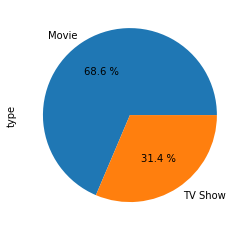

In [199]:
#Gráfico circular
plt.figure()
netflix_base['type'].value_counts().plot.pie(autopct="%0.1f %%")
plt.show()

Observamos que claramente hay más de doble de películas que TV-shows en nuestra base.Esto muestra que , de la data total (que incluye todos los países) , el 68.6% son películas y el 31.84% son TV-shows.

In [200]:
netflix_base.type.value_counts()

Movie      5748
TV Show    2630
Name: type, dtype: int64

Como la diferencia entre la cantidad de películas y TV-shows es alta, hacemos un análisis diferenciado y creamos 2 nuevos data frames.Asimismo, esta separación de data es más adecuada; pues la duración para las películas está en minutos, mientras que la duración de los TV-shows está en temporadas (seasons)

### Gráfico de las personas que ven TV shows y películas según el tipo de público objetivo

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


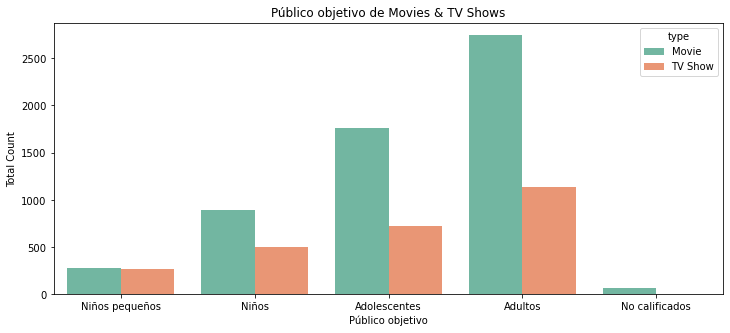

In [201]:
order = ['Niños pequeños','Niños','Adolescentes','Adultos','No calificados']
plt.figure(figsize=(12,5))
g = sns.countplot(netflix_base.público_objetivo, hue=netflix_base.type, order=order, palette="Set2");
plt.title("Público objetivo de Movies & TV Shows")
plt.xlabel("Público objetivo")
plt.ylabel("Total Count")
plt.show()

En conclusión, tanto los niños pequeños,niños, adolescentes,adultos y otros, prefieren ver películas que TV shows en todos los países.

### Creación de función

In [202]:
def dejar_solo_cifras(txt):
    return "".join(c for c in txt if c.isdigit())

In [203]:
netflix_base.duration=netflix_base.duration.map(dejar_solo_cifras)
netflix_base['duration']=netflix_base['duration'].astype(int)
netflix_base
#Ahora duración puede ser 90 min o 2 temporadas(seasons)
#Los números altos se refiere a min y los números bajos a seasons

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_13576/3898004484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_base['duration']=netflix_base['duration'].astype(int)


show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                         Not specified  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                         Not specified  United States   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                      Not specified  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating  duration  \
0    2021-09-25          2020  PG-13        90   
1    2021-09-24          2021  TV-MA         2   
2    2021-09-24          2021  TV-MA         1   
3    2021-09-24          2021  TV-MA         1   
4    2021-09-24          2021  TV-MA         2   
...         ...           ...    ...       ...   
8802 2019-11-20          2007      R       158   
8803 2019-07-01          2018  TV-Y7         2   
8804 2019-11-01          2009      R        88   
8805 2020-01-11          2006     PG        88   
8806 2019-03-02          2015  TV-14       111   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  month_added  \
0     As her father nears the end of his life, filmm...            9   
1     After crossing paths at a party, a Cape Town t...            9   
2     To protect his family from a powerful drug lor...            9   
3     Feuds, flirtations and toilet talk go down amo...            9   
4     In a city of coaching centers known to train I...            9   
...                                                 ...          ...   
8802  A political cartoonist, a crime reporter and a...           11   
8803  While living alone in a spooky town, a young g...            7   
8804  Looking to survive in a world taken over by zo...           11   
8805  Dragged from civilian life, a former superhero...            1   
8806  A scrappy but poor boy worms his way into a ty...            3   

     month_name_added  year_added  tiempo_subida_netflix  \
0           September        2021                      1   
1           September        2021       

In [204]:
netflix_base.country=netflix_base.country.astype('string')
netflix_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   show_id                    8378 non-null   object        
 1   type                       8378 non-null   object        
 2   title                      8378 non-null   object        
 3   director                   8378 non-null   object        
 4   cast                       8378 non-null   object        
 5   country                    8378 non-null   string        
 6   date_added                 8378 non-null   datetime64[ns]
 7   release_year               8378 non-null   int64         
 8   rating                     8378 non-null   string        
 9   duration                   8378 non-null   int32         
 10  listed_in                  8378 non-null   object        
 11  description                8378 non-null   object        
 12  month_

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Encuentro el top 10 de países que contribuye a Netflix

In [205]:
#Encuentro los países con más de 100 observaciones (top 10)
top_countries=netflix_base.country.value_counts().loc[lambda x : x>100] 
top_countries

United States     3427
India              906
United Kingdom     404
Japan              239
South Korea        199
Canada             181
Spain              145
France             123
Mexico             107
Turkey             105
Name: country, dtype: Int64

In [206]:
netflix_base_top10=netflix_base[(netflix_base.country=='United States')|(netflix_base.country=='India')|(netflix_base.country=='United Kingdom')|(netflix_base.country=='Japan')|(netflix_base.country=='South Korea')|(netflix_base.country=='Canada')|(netflix_base.country=='Spain')|(netflix_base.country=='France')|(netflix_base.country=='Mexico')|(netflix_base.country=='Turkey')]
netflix_base_top10

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
5         s6  TV Show          Midnight Mass    Mike Flanagan   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                         Not specified  United States   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                         Not specified  United States   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...  United States   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                      Not specified  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating  duration  \
0    2021-09-25          2020  PG-13        90   
2    2021-09-24          2021  TV-MA         1   
3    2021-09-24          2021  TV-MA         1   
4    2021-09-24          2021  TV-MA         2   
5    2021-09-24          2021  TV-MA         1   
...         ...           ...    ...       ...   
8802 2019-11-20          2007      R       158   
8803 2019-07-01          2018  TV-Y7         2   
8804 2019-11-01          2009      R        88   
8805 2020-01-11          2006     PG        88   
8806 2019-03-02          2015  TV-14       111   

                                              listed_in  \
0                                         Documentaries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
5                    TV Dramas, TV Horror, TV Mysteries   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  month_added  \
0     As her father nears the end of his life, filmm...            9   
2     To protect his family from a powerful drug lor...            9   
3     Feuds, flirtations and toilet talk go down amo...            9   
4     In a city of coaching centers known to train I...            9   
5     The arrival of a charismatic young priest brin...            9   
...                                                 ...          ...   
8802  A political cartoonist, a crime reporter and a...           11   
8803  While living alone in a spooky town, a young g...            7   
8804  Looking to survive in a world taken over by zo...           11   
8805  Dragged from civilian life, a former superhero...            1   
8806  A scrappy but poor boy worms his way into a ty...            3   

     month_name_added  year_added  tiempo_subida_netflix  \
0           September        2021                      1   
2           September        2021       

### Encuentro el top 10 de países que contribuye a Netflix con películas

In [207]:
netflix_base_top10_movies=netflix_base_top10[(netflix_base_top10.type=='Movie')]
netflix_base_top10_movies

show_id   type                                              title  \
0         s1  Movie                               Dick Johnson Is Dead   
6         s7  Movie                   My Little Pony: A New Generation   
9        s10  Movie                                       The Starling   
13       s14  Movie                   Confessions of an Invisible Girl   
16       s17  Movie  Europe's Most Dangerous Man: Otto Skorzeny in ...   
...      ...    ...                                                ...   
8799   s8800  Movie                                              Zenda   
8802   s8803  Movie                                             Zodiac   
8804   s8805  Movie                                         Zombieland   
8805   s8806  Movie                                               Zoom   
8806   s8807  Movie                                             Zubaan   

                                           director  \
0                                   Kirsten Johnson   
6                     Robert Cullen, José Luis Ucha   
9                                    Theodore Melfi   
13                                    Bruno Garotti   
16    Pedro de Echave García, Pablo Azorín Williams   
...                                             ...   
8799                                 Avadhoot Gupte   
8802                                  David Fincher   
8804                                Ruben Fleischer   
8805                                   Peter Hewitt   
8806                                    Mozez Singh   

                                                   cast        country  \
0                                         Not specified  United States   
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...  United States   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...  United States   
13    Klara Castanho, Lucca Picon, Júlia Gomes, Marc...  United States   
16                                        Not specified  United States   
...                                                 ...            ...   
8799  Santosh Juvekar, Siddharth Chandekar, Sachit P...          India   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating  duration  \
0    2021-09-25          2020  PG-13        90   
6    2021-09-24          2021     PG        91   
9    2021-09-24          2021  PG-13       104   
13   2021-09-22          2021  TV-PG        91   
16   2021-09-22          2020  TV-MA        67   
...         ...           ...    ...       ...   
8799 2018-02-15          2009  TV-14       120   
8802 2019-11-20          2007      R       158   
8804 2019-11-01          2009      R        88   
8805 2020-01-11          2006     PG        88   
8806 2019-03-02          2015  TV-14       111   

                                           listed_in  \
0                                      Documentaries   
6                           Children & Family Movies   
9                                   Comedies, Dramas   
13                Children & Family Movies, Comedies   
16               Documentaries, International Movies   
...                                              ...   
8799                    Dramas, International Movies   
8802                  Cult Movies, Dramas, Thrillers   
8804                         Comedies, Horror Movies   
8805              Children & Family Movies, Comedies   
8806  Dramas, International Movies, Music & Musicals   

                                            description  month_added  \
0     As her father nears the end of his life, filmm...            9   
6     Equestria's divided. But a bright-eyed hero be...            9   
9     A woman adjusting to life after a loss contend...            9   
13  

In [208]:
netflix_base_top10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5836 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   show_id                    5836 non-null   object        
 1   type                       5836 non-null   object        
 2   title                      5836 non-null   object        
 3   director                   5836 non-null   object        
 4   cast                       5836 non-null   object        
 5   country                    5836 non-null   string        
 6   date_added                 5836 non-null   datetime64[ns]
 7   release_year               5836 non-null   int64         
 8   rating                     5836 non-null   string        
 9   duration                   5836 non-null   int32         
 10  listed_in                  5836 non-null   object        
 11  description                5836 non-null   object        
 12  month_

In [209]:
alt.Chart(netflix_base_top10_movies).mark_point().encode(
    x = alt.X("duration",  title = "Duración de película"),
    y = alt.Y("date_added" ,  title = "Año añadida a Netlix"),
    color = alt.Color("country"),
    size = alt.Size('rating')
    ).interactive().properties(
    title={
      "text": ["Esto es un gráfico de películas que se agregaron a Netflix "], 
      "subtitle": ["Top 10 países que más consumen Netlix",
                   "Fuente: Kaggle"],
      "color": "Green",
      "subtitleColor": "Gray"
    })

alt.Chart(...)

Se observa que ,para el caso de USA, la duración de las películas que se añadieron a Netflix duran entre 90 a 120 minutos en su mayoría. Para el caso de India, la duración de las películas que se añadieron a Netflix duran entre 100 a 160 minutos en su mayoría.Para el caso de Reino Unido, la duración de las películas que se añadieron a Netflix duran entre 60 a 100 minutos en su mayoría. Finalmente, los 10 países tienen películas en su mayoría dirigida a adultos

### Encuentro el top 10 de países que contribuye a Netflix con TV shows

In [162]:
netflix_base_top10_TV_show=netflix_base_top10[(netflix_base_top10.type=='TV Show')]
netflix_base_top10_TV_show

show_id     type                          title         director  \
2         s3  TV Show                      Ganglands  Julien Leclercq   
3         s4  TV Show          Jailbirds New Orleans          Unknown   
4         s5  TV Show                   Kota Factory          Unknown   
5         s6  TV Show                  Midnight Mass    Mike Flanagan   
8         s9  TV Show  The Great British Baking Show  Andy Devonshire   
...      ...      ...                            ...              ...   
8780   s8781  TV Show                   Yo-Kai Watch          Unknown   
8783   s8784  TV Show                           Yoko          Unknown   
8785   s8786  TV Show                            YOM          Unknown   
8796   s8797  TV Show                     Yunus Emre          Unknown   
8803   s8804  TV Show                    Zombie Dumb          Unknown   

                                                   cast         country  \
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   United States   
3                                         Not specified   United States   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...           India   
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...   United States   
8     Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...  United Kingdom   
...                                                 ...             ...   
8780  Johnny Yong Bosch, J.W. Terry, Alicyn Packard,...   United States   
8783  Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...   United States   
8785  Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...   United States   
8796  Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...          Turkey   
8803                                      Not specified   United States   

     date_added  release_year rating  duration  \
2    2021-09-24          2021  TV-MA         1   
3    2021-09-24          2021  TV-MA         1   
4    2021-09-24          2021  TV-MA         2   
5    2021-09-24          2021  TV-MA         1   
8    2021-09-24          2021  TV-14         9   
...         ...           ...    ...       ...   
8780 2016-04-01          2015  TV-Y7         1   
8783 2018-06-23          2016   TV-Y         1   
8785 2018-06-07          2016  TV-Y7         1   
8796 2017-01-17          2016  TV-PG         2   
8803 2019-07-01          2018  TV-Y7         2   

                                              listed_in  \
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
5                    TV Dramas, TV Horror, TV Mysteries   
8                          British TV Shows, Reality TV   
...                                                 ...   
8780                             Anime Series, Kids' TV   
8783                                           Kids' TV   
8785                                           Kids' TV   
8796                  International TV Shows, TV Dramas   
8803             Kids' TV, Korean TV Shows, TV Comedies   

                                            description  month_added  \
2     To protect his family from a powerful drug lor...            9   
3     Feuds, flirtations and toilet talk go down amo...            9   
4     In a city of coaching centers known to train I...            9   
5     The arrival of a charismatic young priest brin...            9   
8     A talented batch of amateur bakers face off in...            9   
...                                                 ...          ...   
8780  Nate frees a mythical being trapped in a magic...            4   
8783  Friends Mai, Oto and Vik's games at the park b...            6   
8785  With the mind of a human being, and the body o...            6   
8796  During the Mongol invasions, Yunus Emre leaves...            1   
8803  While living alone in a spooky town, a young g...            7   

     month_name_added  year_added  tiempo_subida_net

In [164]:
alt.Chart(netflix_base_top10_TV_show).mark_point().encode(
    x = alt.X("duration",  title = "# de temporadas"),
    y = alt.Y("date_added" ,  title = "Año añadida a Netlix"),
    color = alt.Color("country"),
    size = alt.Size('rating')
    ).interactive().properties(
    title={
      "text": ["Esto es un gráfico de TV shows que se agregaron a Netflix "], 
      "subtitle": ["Top 10 países que más consumen Netlix",
                   "Fuente: Kaggle"],
      "color": "Green",
      "subtitleColor": "Red"
    })

alt.Chart(...)

Se observa que, para el caso de los 10 países, los TV shows tienen en su mayoría máximo 5 temporadas, siendo solo USA y Reino quienes tienen series de 8 y 10 temporadas, respectivamente. Al igual que USA, la mayoría de sus series están dirigidas a adultos